In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
%cd /content/drive/MyDrive/polynomial

/content/drive/MyDrive/polynomial


In [36]:
!pwd

/content/drive/MyDrive/polynomial


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
train = pd.read_csv('/content/drive/MyDrive/polynomial/Polynomial_train.csv')
train = train.iloc[0:50001, 1:]
train = train.to_numpy()

In [39]:
train.shape

(50000, 4)

In [40]:
#featurescling
min = np.amin(train, axis = 0)
max = np.amax(train, axis = 0)

for i in range(3):
  train[:, i] = (train[:,i] - min[i]) / (max[i] - min[i])
print(train)

[[ 2.31825498e-01  6.20152605e-03  2.10583504e-01  3.07972927e+02]
 [ 1.88042744e-01  2.82875591e-01  6.50156775e-02  1.36398375e+02]
 [ 1.28715899e-01  3.70153800e-01  4.09480954e-01 -3.10724813e+02]
 ...
 [ 3.61922568e-01  3.24329859e-01  4.76380343e-01  6.63873655e+02]
 [ 2.95305056e-01  6.57666157e-01  2.61048494e-01 -4.21004005e+02]
 [ 2.31383690e-01  8.55076395e-01  3.40440602e-01 -6.99718682e+02]]


In [41]:
# from sklearn import preprocessing
# minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
# train = minmax.fit_transform(train)
# train

In [42]:
final = np.vstack(train[:,3])

x0 = np.ones([np.shape(train)[0], 1]).reshape([np.shape(train)[0],1])
x1 = train[:, 0].reshape([np.shape(train)[0],1])
x2 = train[:, 1].reshape([np.shape(train)[0],1])
x3 = train[:, 2].reshape([np.shape(train)[0],1])
x4 = np.square(x1)
x5 = np.square(x2)
x6 = np.square(x3)
x7 = np.multiply(x1,x2)
x8 = np.multiply(x1,x3)
x9 = np.multiply(x2,x3)
x10 = x1*x1*x1
x11 = x2*x2*x2
x12 = x3*x3*x3
trainX = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12), axis =1)

trainX = np.concatenate((x0, trainX), axis = 1)

np.shape(trainX)

(50000, 13)

In [43]:
def normeq(X, Y):
  inv = np.linalg.inv(np.dot(X.T,X))
  theta = np.dot(np.dot(inv, X.T ), Y )
  pred = np.dot(X, theta)
  return pred

In [44]:
def grad(X, Y, learning_rate, noofiter):
  row,column = np.shape(X)
  theta = np.zeros([column,1], dtype = int)
  costvalues = []

  for t in range(noofiter):
    y_pred = np.dot(X, theta)
    cost = (1/(2*row))*np.sum(np.square(y_pred - Y))
    costdif = (1/(row))*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*costdif
    costvalues.append(cost)

    if( t % (noofiter/10) == 0):
      print("Cost after", t ,"is :", cost)
  #print(y_pred)

  return y_pred,costvalues, theta

In [45]:
noofiter = 90000
y_pred, costvalues, theta= grad(X = trainX, Y= final, learning_rate=0.999, noofiter=noofiter )

Cost after 0 is : 727060.5592130942
Cost after 9000 is : 467.3122743426775
Cost after 18000 is : 143.91011329486778
Cost after 27000 is : 93.9157251530821
Cost after 36000 is : 76.97446030569455
Cost after 45000 is : 69.95548056336904
Cost after 54000 is : 66.21136555089325
Cost after 63000 is : 63.6273510826634
Cost after 72000 is : 61.51902616122635
Cost after 81000 is : 59.65915464420425


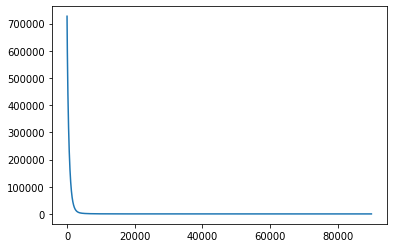

In [46]:
plt.plot(np.arange(0, noofiter), costvalues)
plt.show()

In [47]:
testdf = pd.read_csv('/content/drive/MyDrive/polynomial/Polynomial_test.csv')
testdf

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


In [48]:
testdf = testdf.iloc[:, 1:]
test = testdf.to_numpy()

In [49]:
#featurescling
for i in range(3):
  test[:, i] = (test[:,i] - min[i]) / (max[i] - min[i])
print(test)

[[ 4.20846485e-01  4.72097639e-01  7.99842723e-01 -6.57669309e+02]
 [ 2.79051515e-01  7.31778181e-01  8.21502668e-01 -5.45362524e+02]
 [ 1.59655091e-01  8.05759362e-01  1.55953990e-01 -7.50441866e+01]
 ...
 [ 3.62450606e-01  7.64506478e-01  7.26412060e-01 -1.77164069e+03]
 [ 8.14050223e-02  5.13345672e-01  3.06208480e-01 -2.27469212e+01]
 [ 3.98362554e-01  4.36536172e-01  6.06142711e-01 -6.48534457e+01]]


In [50]:
testx0 = np.ones([np.shape(test)[0], 1]).reshape([np.shape(test)[0], 1])
testx1 = test[:, 0].reshape([np.shape(test)[0], 1])
testx2 = test[:, 1].reshape([np.shape(test)[0], 1])
testx3 = test[:, 2].reshape([np.shape(test)[0], 1])
testx4 = np.square(testx1)
testx5 = np.square(testx2)
testx6 = np.square(testx3)
testx7 = np.multiply(testx1,testx2)
testx8 = np.multiply(testx1,testx3)
testx9 = np.multiply(testx2,testx3)
testx10 = testx1**3
testx11 = testx2**3
testx12 = testx3**3
testX = np.concatenate((testx0,testx1,testx2,testx3,testx4,testx5,testx6,testx7,testx8,testx9,testx10,testx11,testx12), axis =1)

testfinal = np.vstack(test[:,3])

testX.shape

(10000, 13)

In [51]:
testfinalpred = np.dot(testX, theta)

In [54]:
rmserror = np.sqrt(np.sum(np.square(testfinalpred - testfinal))/(testX.shape[0]))
rmserror

2.2988830355111163